In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from mlxtend.plotting import plot_learning_curves
from yellowbrick.model_selection import LearningCurve
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

**Contador de tempo**

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print('\n Tempo Necessário: %i minutos and %s segundos.' % (tmin, round(tsec, 2)))

**Inserir os caminhos de Treino e Validação - Testar com a base de teste somente no final**  
**Ajustar a quantia de características no dataframe**  
**Ajustar o nome da variável alvo**

In [3]:
train = pd.read_csv('trainLR.csv')
X_train = pd.DataFrame(train.iloc[:,1:87])
Y_train = pd.DataFrame(train.loc[:, train.columns == 'Y'])
test = pd.read_csv('testLR.csv')
X_test = pd.DataFrame(test.iloc[:,1:87])
Y_test = pd.DataFrame(test.loc[:, test.columns == 'Y'])

**Realizar balanceamento na base de treino**

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_smote, y_smote=smote.fit_sample(X_train, Y_train.values.ravel())

Using TensorFlow backend.


**Verificar o Balanceamento**

Class 0: 22622
Class 1: 22622
Proportion: 1.0 :1


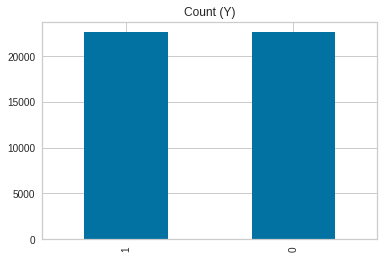

In [5]:
target_count = pd.Series(y_smote)
target_count = target_count.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ':1')

target_count.plot(kind='bar', title='Count (Y)');

In [6]:
print(X_smote.shape)

(45244, 86)


In [7]:
print(y_smote.shape)

(45244,)


In [8]:
print(X_smote)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+02
   6.25000000e+02  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+02
   3.33333333e-01  1.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.00000000e+00
   6.09335680e-01  1.50000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   5.00000000e-01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.79893594e+01
   6.60565832e-01  4.96339499e+00]]


**Árvore de Decisão**


 Tempo Necessário: 0 minutos and 0.68 segundos.


<Figure size 432x288 with 0 Axes>

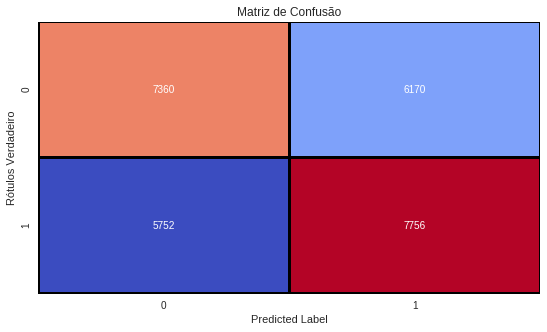

<Figure size 432x288 with 0 Axes>

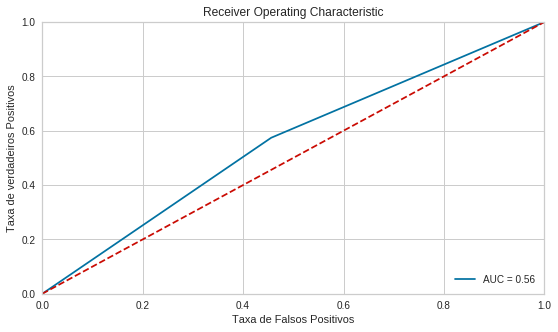

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.56      0.54      0.55     13530
           1       0.56      0.57      0.57     13508

    accuracy                           0.56     27038
   macro avg       0.56      0.56      0.56     27038
weighted avg       0.56      0.56      0.56     27038

Acurácia do Modelo


0.5590650196020416

In [9]:
starttime = timer(None)
start_time = timer(None)
clf_DecisionTreeClassifier = DecisionTreeClassifier()
clf_DecisionTreeClassifier.fit(X_smote, y_smote)
DecisionTreeClassifier_pred = clf_DecisionTreeClassifier.predict(X_test)
timer(start_time)
accuracy_score(Y_test, DecisionTreeClassifier_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test ,DecisionTreeClassifier_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(1)
matrix_DecisionTreeClassifier = confusion_matrix(Y_test, DecisionTreeClassifier_pred)
plt.figure(figsize=(9,5))
DecisionTreeClassifier = sns.heatmap(matrix_DecisionTreeClassifier, annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 2)
bottom, top = DecisionTreeClassifier.get_ylim()
DecisionTreeClassifier.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Rótulos Verdadeiro')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()



plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('Taxa de verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()



print("Relatório de Classificação")
print(classification_report(Y_test, DecisionTreeClassifier_pred))

print("Acurácia do Modelo")
accuracy_score(Y_test, DecisionTreeClassifier_pred)

**Random Forest**


 Tempo Necessário: 0 minutos and 9.38 segundos.


<Figure size 432x288 with 0 Axes>

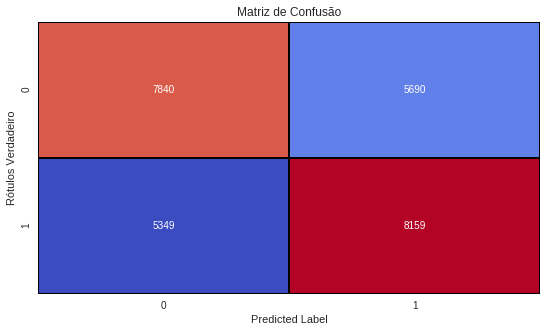

<Figure size 432x288 with 0 Axes>

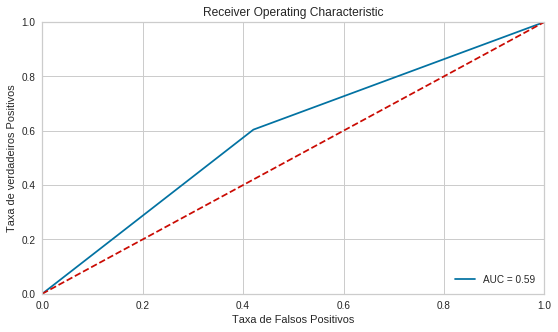

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     13530
           1       0.59      0.60      0.60     13508

    accuracy                           0.59     27038
   macro avg       0.59      0.59      0.59     27038
weighted avg       0.59      0.59      0.59     27038

Acurácia do Modelo


0.5917227605592129

In [10]:
starttime = timer(None)
start_time = timer(None)
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_smote, y_smote)
RandomForestClassifier_pred = clf.predict(X_test)
timer(start_time)
accuracy_score(Y_test, RandomForestClassifier_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, RandomForestClassifier_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.figure(1)
matrix_RandomForestClassifier = confusion_matrix(Y_test, RandomForestClassifier_pred)
plt.figure(figsize=(9,5))
map_RandomForestClassifier = sns.heatmap(matrix_RandomForestClassifier, annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 1)
bottom, top = map_RandomForestClassifier.get_ylim()
map_RandomForestClassifier.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Rótulos Verdadeiro')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('Taxa de verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()



print("Relatório de Classificação")
print(classification_report(Y_test, RandomForestClassifier_pred))

print("Acurácia do Modelo")
accuracy_score(Y_test, RandomForestClassifier_pred)

**AdaBoost**


 Tempo Necessário: 0 minutos and 11.34 segundos.


<Figure size 432x288 with 0 Axes>

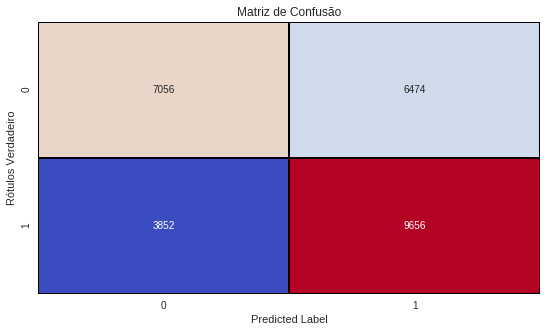

<Figure size 432x288 with 0 Axes>

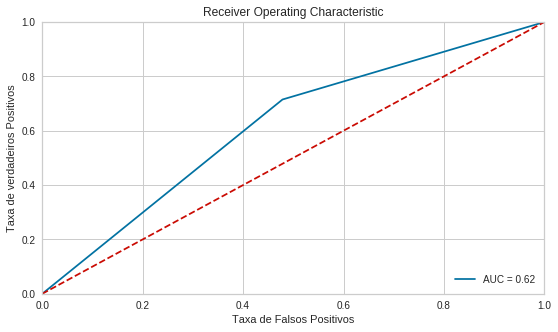

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.65      0.52      0.58     13530
           1       0.60      0.71      0.65     13508

    accuracy                           0.62     27038
   macro avg       0.62      0.62      0.61     27038
weighted avg       0.62      0.62      0.61     27038

Acurácia do Modelo


0.6180930542199867

In [11]:
starttime = timer(None)
start_time = timer(None)
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_smote, y_smote)
AdaBoostClassifier_pred = clf.predict(X_test)
timer(start_time)
accuracy_score(Y_test, AdaBoostClassifier_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, AdaBoostClassifier_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.figure(1)
matrix_AdaBoostClassifier = confusion_matrix(Y_test, AdaBoostClassifier_pred)
plt.figure(figsize=(9,5))
map_matrix_AdaBoostClassifier = sns.heatmap(matrix_AdaBoostClassifier, annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 1)
bottom, top = map_matrix_AdaBoostClassifier.get_ylim()
map_matrix_AdaBoostClassifier.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Rótulos Verdadeiro')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('Taxa de verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()


print("Relatório de Classificação")
print(classification_report(Y_test, AdaBoostClassifier_pred))

print("Acurácia do Modelo")
accuracy_score(Y_test, AdaBoostClassifier_pred)

**Gradient Boosting**

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.65      0.50      0.57     13530
           1       0.59      0.73      0.65     13508

    accuracy                           0.61     27038
   macro avg       0.62      0.61      0.61     27038
weighted avg       0.62      0.61      0.61     27038

Acurácia do Modelo


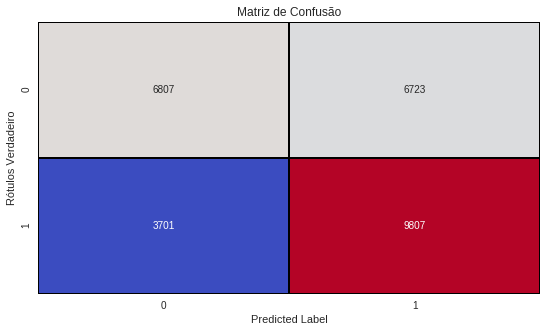

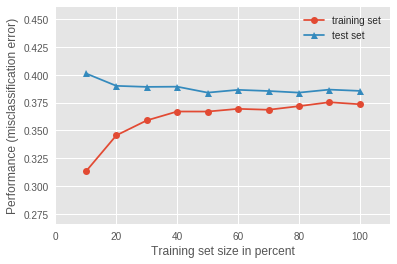

In [12]:
gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_features=2, max_depth=2, random_state=1)
gb_clf2.fit(X_smote, y_smote)
GradientBoostingClassifier_predictions = gb_clf2.predict(X_test)

matrix_GradientBoostingClassifier2 = confusion_matrix(Y_test, GradientBoostingClassifier_predictions)
plt.figure(figsize=(9,5))
map_matrix_GradientBoostingClassifier2 = sns.heatmap(matrix_GradientBoostingClassifier2, annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 1)
bottom, top = map_matrix_GradientBoostingClassifier2.get_ylim()
map_matrix_GradientBoostingClassifier2.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Rótulos Verdadeiro')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão')



print("Relatório de Classificação")
print(classification_report(Y_test, GradientBoostingClassifier_predictions))

print("Acurácia do Modelo")
accuracy_score(Y_test, GradientBoostingClassifier_predictions)

plt.figure()
plot_learning_curves(X_smote, y_smote, X_test, Y_test.values.ravel(), gb_clf2, print_model=False, style='ggplot')
plt.show()

**XGBoosting**


 Tempo Necessário: 1 minutos and 18.58 segundos.
0.6181147202156085


<Figure size 432x288 with 0 Axes>

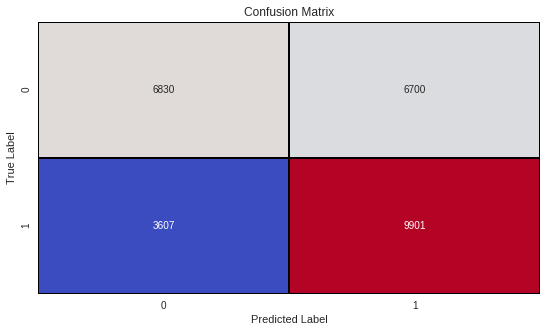

<Figure size 432x288 with 0 Axes>

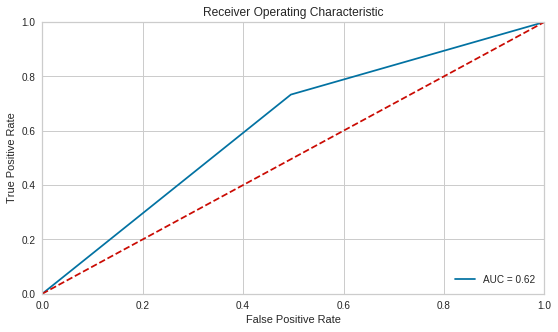

<Figure size 432x288 with 0 Axes>

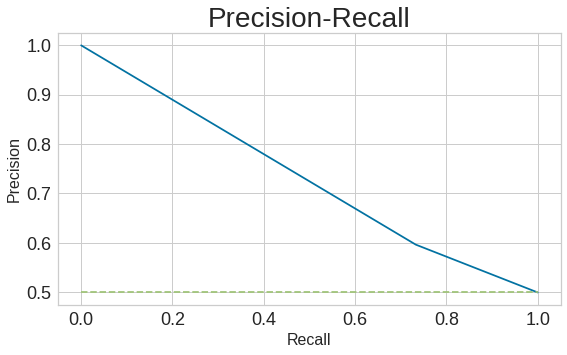

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.50      0.57     13530
           1       0.60      0.73      0.66     13508

    accuracy                           0.62     27038
   macro avg       0.63      0.62      0.61     27038
weighted avg       0.63      0.62      0.61     27038

Acurácia do Modelo
Acurácia do Modelo Cross Validation
0.6181147202156085


In [13]:
starttime = timer(None)
start_time = timer(None)
xgb_clf = XGBClassifier(base_score=0.01, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=1, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_clf.fit(X_smote, y_smote)
predictions_xgb = xgb_clf.predict(X_test.values)
scores = cross_val_score(xgb_clf, X_smote, y_smote, cv=10)
timer(start_time)

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
matrix_xgb_clf = confusion_matrix(Y_test, predictions_xgb)

print(scores.mean())

plt.figure(1)
plt.figure(figsize=(9,5))
xgb_clf_heatmap = sns.heatmap(matrix_xgb_clf,annot=True, cbar=False, fmt="d", cmap ='coolwarm', linecolor ='black', linewidths = 1)
bottom, top = xgb_clf_heatmap.get_ylim()
xgb_clf_heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(3)
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_xgb)
plt.figure(figsize = (9,5))
plt.plot(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Precision-Recall', fontsize = 28)
plt.show();


print("Classification Report")
print(classification_report(Y_test, predictions_xgb))

print("Acurácia do Modelo")
accuracy_score(Y_test, predictions_xgb)

print("Acurácia do Modelo Cross Validation")
print(scores.mean())

**Voting Classifier**


 Tempo Necessário: 1 minutos and 25.86 segundos.


<Figure size 432x288 with 0 Axes>

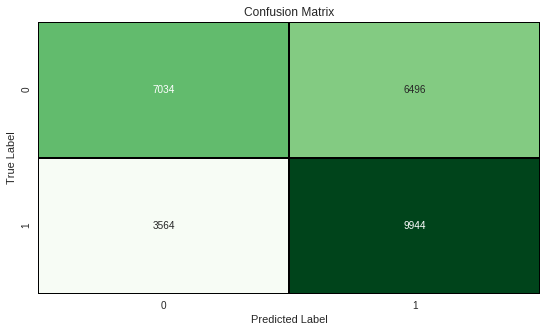

<Figure size 432x288 with 0 Axes>

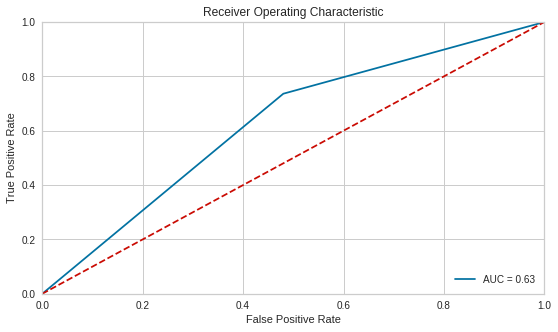

<Figure size 432x288 with 0 Axes>

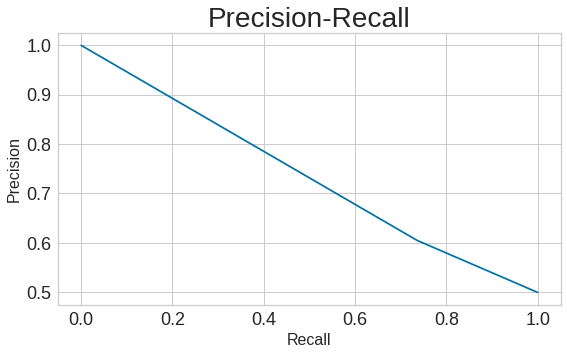

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.52      0.58     13530
           1       0.60      0.74      0.66     13508

    accuracy                           0.63     27038
   macro avg       0.63      0.63      0.62     27038
weighted avg       0.63      0.63      0.62     27038

Acurácia do Modelo


0.6279310599896442

In [14]:
from sklearn.ensemble import VotingClassifier

starttime = timer(None)
start_time = timer(None)

#Best: 0.616492 using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 300}
model1 = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='gini', n_jobs=4)

#Best: 0.614828 using {'learning_rate': 0.4, 'n_estimators': 600}
model2 = AdaBoostClassifier(n_estimators=600, learning_rate=0.4)

#Best: 0.628343 using {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic'}
model3 = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, objective='binary:logistic', n_jobs=4)
    
    
model = VotingClassifier(estimators=[('rf', model1), ('ada', model2), ('xgb', model3)], voting='hard')

                                     
model.fit(X_smote, y_smote)
predictions_model = model.predict(X_test.values)
timer(start_time)

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions_model)
roc_auc = auc(false_positive_rate, true_positive_rate)
matrix_model = confusion_matrix(Y_test, predictions_model)



plt.figure(1)
plt.figure(figsize=(9,5))
model_heatmap = sns.heatmap(matrix_model,annot=True, cbar=False, fmt="d", cmap ='Greens', linecolor ='black', linewidths = 1)
bottom, top = model_heatmap.get_ylim()
model_heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(2)
plt.figure(figsize=(9,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(3)
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_model)
plt.figure(figsize = (9,5))
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Precision-Recall', fontsize = 28)
plt.show();


print("Classification Report")
print(classification_report(Y_test, predictions_model))

print("Acurácia do Modelo")
accuracy_score(Y_test, predictions_model)